In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab 

In [3]:
path = 'trained_models/21-11-2022_12-09-29/'
with open(path+'model_out-ksg-label_tst.npy', 'rb') as f:
    model_out = np.load(f)
    ksg = np.load(f)
    label_tst = np.load(f)

In [4]:
model_err = model_out - label_tst
ksg_err = ksg - label_tst

In [5]:
def conf(x, theor, slope, confidence=0.95, dist="norm"):
    if isinstance(dist, str):
        dist = getattr(stats, dist)
    
    n = x.size
    P = (np.arange(n) + 1 - 0.5) / (n + 1 - 2 * 0.5)
    crit = stats.norm.ppf(1 - (1 - confidence) / 2)
    #print(crit)
    #crit = 2.33

    fit_params = dist.fit(x)
    shape = fit_params[:-2] if len(fit_params) > 2 else None
    pdf = dist.pdf(theor) if shape is None else dist.pdf(theor, *shape)

    se = (slope / pdf) * np.sqrt(P * (1 - P) / n)
    upper = x + crit * se
    lower = x - crit * se
    
    return lower, upper

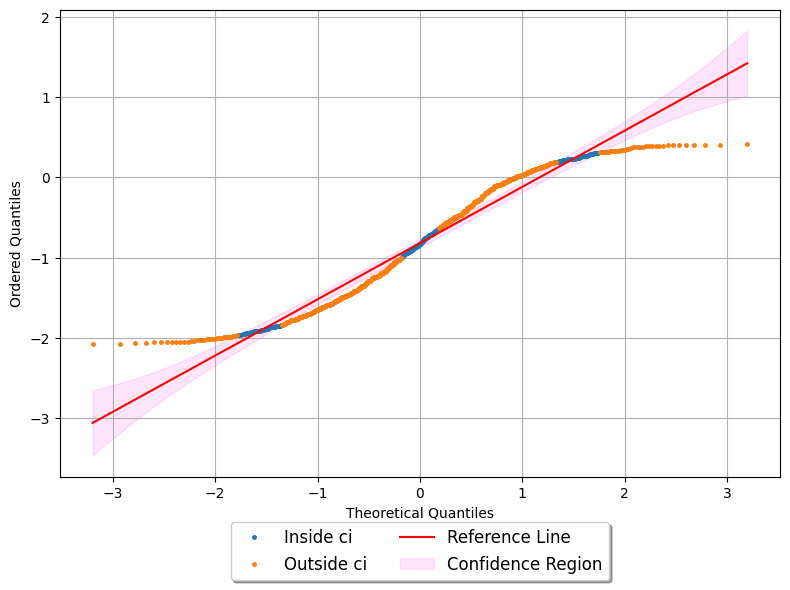

In [7]:
distribution = 'norm'

(theo, data_response), (slope, intercept, r) = stats.probplot(ksg_err.T[0], dist=distribution)

lower, upper = conf(slope*theo+intercept, theo, slope, confidence=0.95, dist=distribution)

idx_inside = np.where((lower <= data_response) & (data_response <= upper))
idx_outside = np.where((lower > data_response) | (data_response > upper))

figsize = (8, 6)
fig, axes = plt.subplots(1, 1, sharey=True , figsize=figsize)
#fig.suptitle('QQ Plot', fontsize=18)

axes.plot(theo[idx_inside], data_response[idx_inside], label='Inside ci', ls='None', marker='.', markersize=5)
if idx_outside[0].size > 0:
    axes.plot(theo[idx_outside], data_response[idx_outside], label='Outside ci', ls='None', marker='.', markersize=5)

axes.plot(theo, slope*theo+intercept, label='Reference Line', color='r')
axes.fill_between(theo, lower, upper, label='Confidence Region', color='#ff00dd', alpha=0.1)

axes.set_xlabel('Theoretical Quantiles')
axes.set_ylabel('Ordered Quantiles')

axes.grid()
#axes.set_title(network, fontsize=12)
axes.legend(bbox_to_anchor=(0.5, -0.08), loc="upper center", fancybox=True, shadow=True, ncol=2, fontsize=12)
plt.tight_layout()
plt.savefig('results/qq_model_residuals_ksg.pdf')
plt.show()

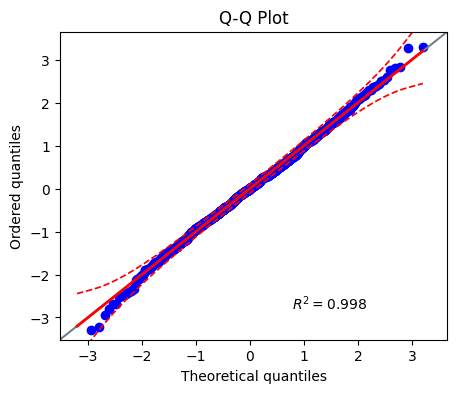

In [111]:
import pingouin as pg
ax = pg.qqplot(model_err.T[0], dist='norm', confidence=0.99)

In [112]:
lines = ax.lines


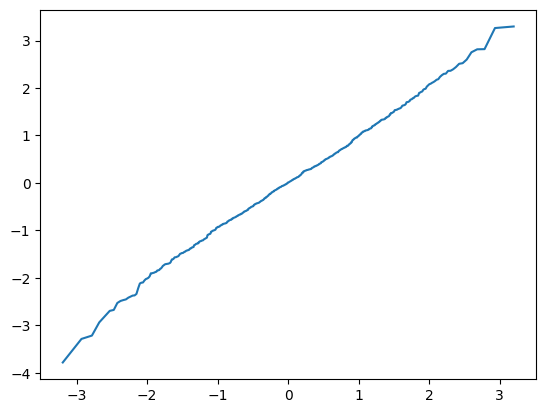

In [104]:
idx = 0
plt.plot(lines[idx].get_xdata(), lines[idx].get_ydata())
plt.show()